In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from cycler import cycler

# Get the current color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
plt.style.use("seaborn-v0_8-muted")
def set_size(width_pt=472.31595, fraction=1, subplots=(1, 1)):
    """Set figure dimensions nicely

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5 ** .5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return fig_width_in, fig_height_in

# Colormap with University colors
colors = ["white", "#005f9b", "#153268"]
nodes = [0.0, 0.8, 1.0]
unimap = matplotlib.colors.LinearSegmentedColormap.from_list("unimap", list(zip(nodes, colors)))
unimap_r = unimap.reversed()
try:
    matplotlib.colormaps.register(cmap=unimap)
    matplotlib.colormaps.register(cmap=unimap_r)
except ValueError:
    pass

# LaTeX text renderer
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "font.serif": "Computer Modern Roman",
    "text.usetex": True,  # use inline math for ticks
    "text.latex.preamble": r"\usepackage{amsmath}",
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10.95,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # Cmap
    "image.cmap": "unimap"
})

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['axes.prop_cycle'] = mpl.cycler(color=mpl.cm.Set2(range(8)))

COLORS = mpl.cycler(color=mpl.cm.Set2(range(8)))

0.000179399663466 0.0020615246612578


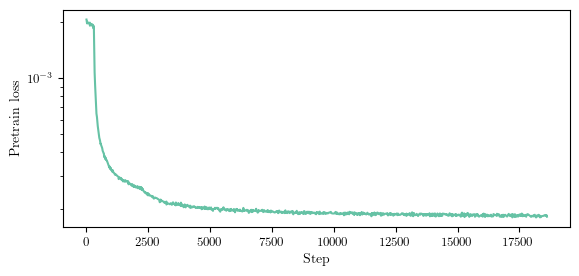

In [41]:
fig, ax1 = plt.subplots(1, 1, figsize=set_size(fraction=1, subplots=(0.7, 1)), sharex=True)

df = pd.read_csv("DIC-C2DH-HeLa_exp_2025-11-01_13-19-55.csv")
ax1.plot(df["Step"], df["Value"], color=list(COLORS)[0]['color'])
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

plt.savefig("pretrain_DIC-C2DH-HeLa.pdf")

print(df["Value"].min(), df["Value"].max())

4.022023858851753e-06 0.0017124806763604


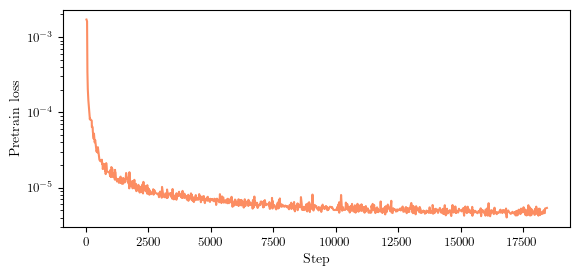

In [42]:
fig, ax1 = plt.subplots(1, 1, figsize=set_size(fraction=1, subplots=(0.7, 1)), sharex=True)

df = pd.read_csv("Fluo-N2DL-HeLa_exp_2025-11-01_13-20-06.csv")
ax1.plot(df["Step"], df["Value"], color=list(COLORS)[1]['color'])
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

plt.savefig("pretrain_Fluo-N2DL-HeLa.pdf")

print(df["Value"].min(), df["Value"].max())

1.5924708350212313e-05 0.0070367208682


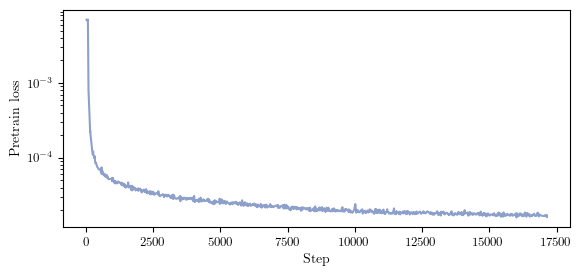

In [43]:
fig, ax1 = plt.subplots(1, 1, figsize=set_size(fraction=1, subplots=(0.7, 1)), sharex=True)

df = pd.read_csv("toaim_exp_2025-11-01_13-20-40.csv")
ax1.plot(df["Step"], df["Value"], color=list(COLORS)[2]['color'])
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

plt.savefig("pretrain_TOIAM.pdf")
print(df["Value"].min(), df["Value"].max())

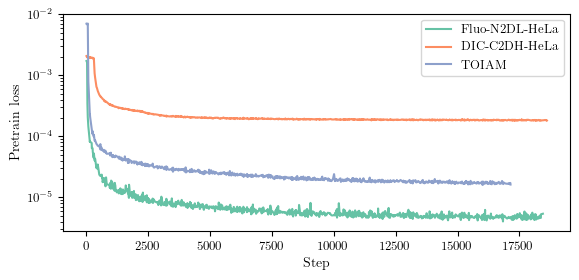

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=set_size(fraction=1, subplots=(0.7, 1)), sharex=True)

df = pd.read_csv("Fluo-N2DL-HeLa_exp_2025-11-01_13-20-06.csv")
ax1.plot(df["Step"], df["Value"], label='Fluo-N2DL-HeLa')
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

df = pd.read_csv("DIC-C2DH-HeLa_exp_2025-11-01_13-19-55.csv")
ax1.plot(df["Step"], df["Value"], label='DIC-C2DH-HeLa')
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

df = pd.read_csv("toaim_exp_2025-11-01_13-20-40.csv")
ax1.plot(df["Step"], df["Value"], label='TOIAM')
ax1.set_xlabel("Step")
ax1.set_ylabel("Pretrain loss")
ax1.set_yscale("log")

ax1.legend()

plt.savefig("pretrain_combined.pdf")